# Principle Component Analysis

- Dimensionality reduction refers to phenomenon of reducing the dimension or number of input variables in dataset.
- Dimensionality reduction is done to get rid of the cures of dimensionality, i.e when dimension increases demand for data also increases otherwise algorithm will not be able to return required output optimally.
- PCA is dimensionality reduction technique from linear algebra.

## 1. Manual Method

### A. Standardizing the data by scaling

Importing the dataset

In [2]:
import pandas as pd

df = pd.read_csv("../Dataset/voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [52]:
df.shape

(3168, 20)

Selecting numeric columns

In [10]:
df.drop(["label"], axis=1, inplace=True)

**Calculating mean of columns**

In [33]:
import numpy as np

In [34]:
mean_of_columns = np.mean(df, axis=0)

In [35]:
mean_of_columns

meanfreq     0.180907
sd           0.057126
median       0.185621
Q25          0.140456
Q75          0.224765
IQR          0.084309
skew         3.140168
kurt        36.568461
sp.ent       0.895127
sfm          0.408216
mode         0.165282
centroid     0.180907
meanfun      0.142807
minfun       0.036802
maxfun       0.258842
meandom      0.829211
mindom       0.052647
maxdom       5.047277
dfrange      4.994630
modindx      0.173752
dtype: float64

**Calculating Standard Deviation**

In [36]:
std_of_columns = np.std(df, axis=0)

In [37]:
std_of_columns

meanfreq      0.029913
sd            0.016650
median        0.036354
Q25           0.048672
Q75           0.023636
IQR           0.042776
skew          4.239859
kurt        134.907364
sp.ent        0.044972
sfm           0.177493
mode          0.077191
centroid      0.029913
meanfun       0.032299
minfun        0.019217
maxfun        0.030073
meandom       0.525122
mindom        0.063289
maxdom        3.520601
dfrange       3.519484
modindx       0.119436
dtype: float64

**Scaling by mean**

In [41]:
scaled_data = (df - mean_of_columns) / std_of_columns

In [42]:
scaled_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


### B. Calculating covariance of scaled data 

In [45]:
covariance_matrix = np.cov(scaled_data.T)

### C. Calculating eigen value and eigen vector

In [47]:
eigen_value, eigen_vector = np.linalg.eig(covariance_matrix)

In [48]:
eigen_value

array([ 9.04613363e+00,  2.37487145e+00,  2.18267684e+00,  1.52443383e+00,
        1.05912186e+00,  9.23284712e-01,  6.41098804e-01,  5.79861823e-01,
        4.90500119e-01,  3.75221945e-01,  3.31285719e-01,  1.79225076e-01,
        1.38101894e-01,  9.38388975e-02,  4.57970264e-02,  7.94694721e-03,
        1.29145527e-02, -6.91559972e-17,  4.04322537e-17,  3.16234712e-16])

We got 20 eigen vectors

In [50]:
eigen_vector.__len__()

20

### D. Calculating the principle component

Calculating the dot product of transpose of eigen vector with transpose of scaled data and transposing it.

In [54]:
pc = eigen_vector.T.dot(scaled_data.T).T

In [55]:
pc

array([[-8.20851631e+00,  2.16448836e+00, -1.95978393e+00, ...,
         8.12129402e-15, -7.54951657e-15,  1.11022302e-15],
       [-8.67189184e+00,  3.85462661e+00, -4.10720799e+00, ...,
         8.07440473e-15, -9.32587341e-15,  2.10942375e-15],
       [-9.11116887e+00,  4.51914027e+00, -7.52825158e+00, ...,
         1.59312899e-14, -1.73194792e-14,  5.99520433e-15],
       ...,
       [-3.83137839e+00, -1.78143380e+00, -1.87075519e-01, ...,
         9.66158075e-15, -1.04360964e-14,  2.88657986e-15],
       [-3.21441858e+00, -1.95563325e+00,  8.00871476e-01, ...,
        -2.71964996e-15,  1.55431223e-15, -1.66533454e-16],
       [-2.36104138e+00, -1.33959575e+00,  9.13831984e-01, ...,
         2.59051002e-15, -3.22658567e-15, -1.11022302e-16]])

## 2. Using Sklearn Library

### A. Standardizing the data by scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaled_ = scaler.fit_transform(df)

### B. Calculating the principle component

In [64]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA()
pc = pca.fit_transform(scaled_)

### C. Analysis

**We can transform the principle components to the original scaled data**

In [71]:
pca.inverse_transform(pca.fit_transform(scaled_))

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

**Variance of each component**

Variance simply represents the percentage of data each component is representing

In [72]:
pca.explained_variance_ratio_

array([4.52163908e-01, 1.18706090e-01, 1.09099393e-01, 7.61976317e-02,
       5.29393771e-02, 4.61496635e-02, 3.20448218e-02, 2.89839393e-02,
       2.45172645e-02, 1.87551752e-02, 1.65590573e-02, 8.95842514e-03,
       6.90291504e-03, 4.69046383e-03, 2.28912851e-03, 6.45523808e-04,
       3.97221935e-04, 2.06171562e-30, 2.56988559e-33, 9.59141303e-35])

**Minimum variance value**

In [73]:
min(pca.explained_variance_ratio_)

9.591413028594606e-35

**Maximum variance value**

In [74]:
max(pca.explained_variance_ratio_)

0.45216390784201543

**Mean variance value**

In [75]:
np.mean(pca.explained_variance_ratio_)

0.05

**Sum of variance of all the components**

Sum of all the variance is 1 that means their is no data loss while reducing the dimension.

In [76]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

**Plotting the Cumulative sum of principle component variance**

In [79]:
import matplotlib.pyplot as plt

We can observe that after 15th principle component variance has become constant so when building the model we can specify that we want exactly 15 or whatever number of principle component only.

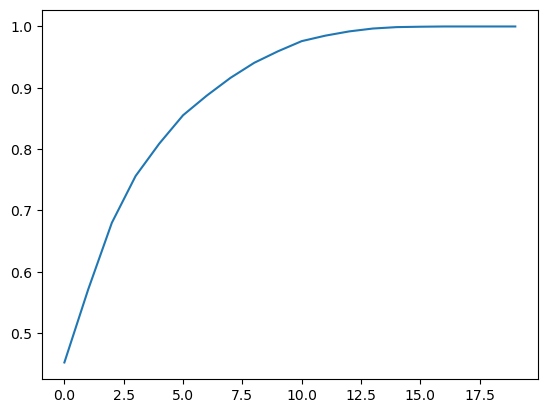

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()